(100, 91, 180)


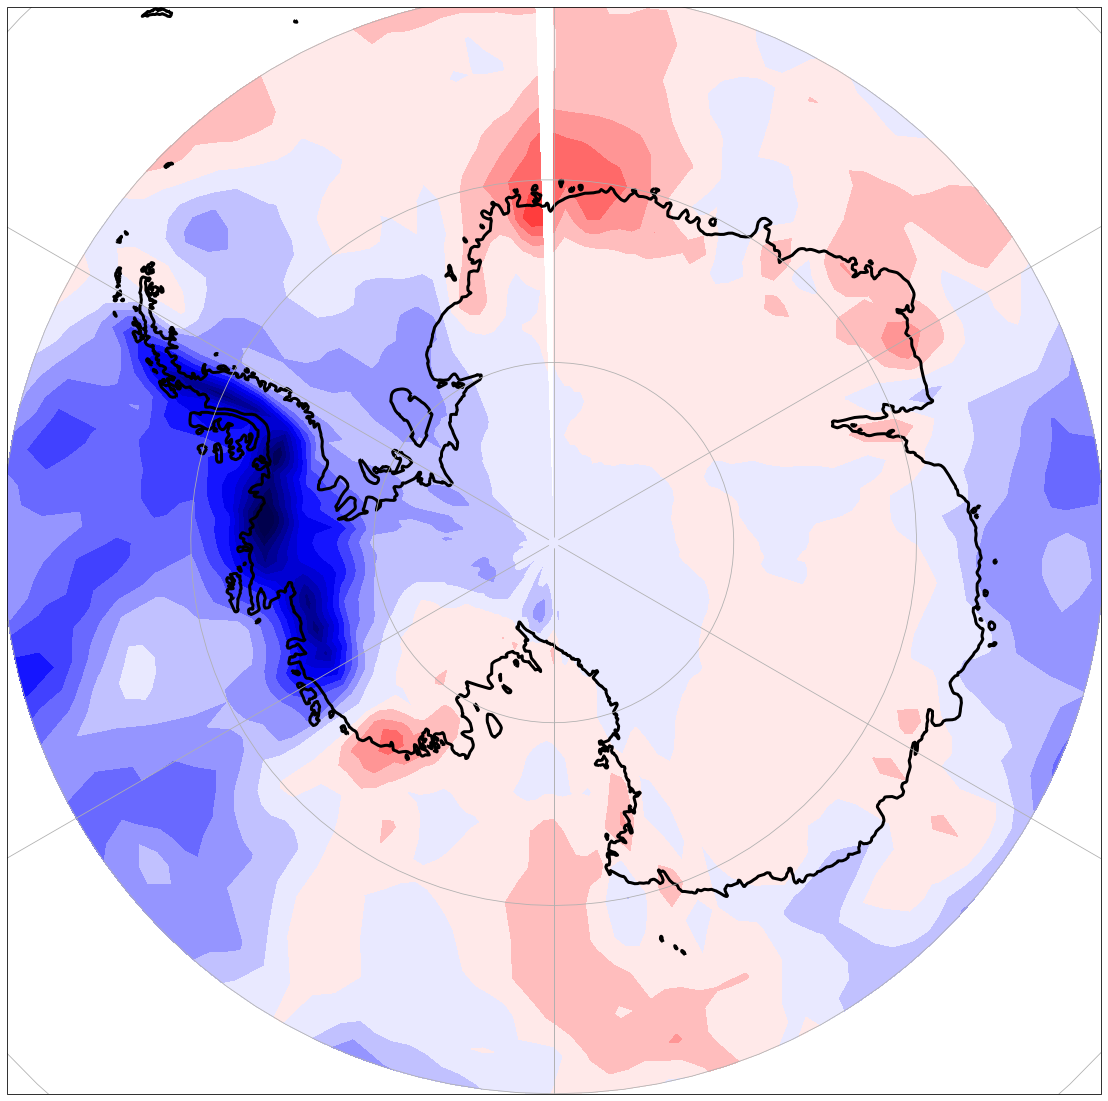

In [14]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

def tempPlot():
    means1 = np.load('ensemble_mean_pr_sfc_Amon.npz', allow_pickle=True)

    
    accums = means1['xam']
    #accums = np.concatenate((means1['xam'], means2['xam'], means3['xam'], means4['xam'], means5['xam'], means6['xam']), axis=0)
    print(accums.shape)
    accums = np.multiply(accums, 31536000)


    trends = np.zeros((16, 180))
    
    accums[22] = (accums[21] + accums[23]) / 2
    
    #for i in range(16):
        #for j in range(180):
            #print(accums[22, i, j])
    
    for i in range(16):
        for j in range(180):
            trend = np.polyfit(np.arange(1957, 2001, 1), accums[56:, i, j], 1)
            
            #trendsStart = trend[0] * 1957 + trend[1]
            #trendsEnd = trend[0] * 2000 + trend[1]
            #trends[i, j] = (trendsEnd - trendsStart) / (-43/10)
            trends[i, j] = trend[0] * (10)
            #print(trends[i, j])
            
            #if i == 8 and j == 135:
                #print(trends[i, j])
    """
    for i in range(16):
        for j in range(180):
            latInd = 300 - (i*20)
            lonInd = 0
            if j < 90:
                lonInd = (j * 20) + 1800
            else:
                lonInd = (j * 20) - 1800
                
            if not(newNC.variables['t2m'][0,latInd,lonInd] > 0) or (j <= 158 and j >= 90):
                accums[:, i, j] = np.nan
            
            #if newNC.variables['t2m'][0,latInd,lonInd] > 0:
                #print(newNC.variables['latitude'][latInd])
                
                
            
    for j in range(len(accums)):
        areaAvgs = np.zeros(13)
        for i in range(13):
            areaAvgs[i] = np.nanmean(accums[j, i, :], axis=0) * ((-20 * (15-i) + 300) * 0.01941 + 1)

        #print(np.true_divide(np.sum(areaAvgs), 55.761))
            
    """
    trends[0, 0] = 18
    trends[0, 1] = -18
    
    trends = trends * (-1)
    
    ax = plt.axes(projection=ccrs.SouthPolarStereo())
    ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())
    ax.gridlines()
    
    plt.rcParams['figure.figsize'] = [20, 20]
    
    plt.contourf(means1['lon'][0:16], means1['lat'][0:16], trends, levels=36, vmin=-18, vmax=18, transform=ccrs.PlateCarree(), cmap=plt.cm.seismic)
    
    #plt.contourf(means1['lon'][0:16], means1['lat'][0:16], trends, levels=10, transform=ccrs.PlateCarree(), cmap=plt.cm.seismic)
    #plt.colorbar(orientation="horizontal", fraction=0.05, shrink=0.9, cmap=plt.cm.seismic)
    
    
    #plt.title("1957-2000")
    
    
    
    ax.coastlines(linewidth=3)
    
    plt.show()

    
tempPlot()